# Williams Angelo Durán Carrasco

#### Primero, separaremos las columnas y los datos en distintos archivos txt, de esta forma será mucho más fácil de leer.
![columas](img/1.png)
![columas](img/2.png)


### Preprocesar el archivo para obtener la información textual y metadatos para leer como Dataframe en Python.

#### Luego, importaremos todas las liberías necesarias

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
sw = stopwords.words('spanish')
print(sw)
import re
import numpy as np

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

#### Leemos el archivo de las columnas

In [39]:
columnas = []
tipos = {}
valores_map = {}

with open('columnas.txt', 'r') as archivo:
    lineas = archivo.readlines()
    for linea in lineas:
        partes = linea.strip().split()
        nombre_columna = partes[0]
        tipo_columna = partes[1]
        columnas.append(nombre_columna)
        tipos[nombre_columna] = tipo_columna
        
        if tipo_columna == 'string':
            valores_map[nombre_columna] = partes[2:]

print("Columnas:", columnas)
print("Tipos:", tipos)
print("Valores Map:", valores_map)

columnas.append('respuestas_adicionales')

Columnas: ['id', 'edad', 'anoscarrera', 'practicas', 'numfamilia', 'genero', 'carrera', 'region']
Tipos: {'id': 'numeric', 'edad': 'numeric', 'anoscarrera': 'numeric', 'practicas': 'numeric', 'numfamilia': 'numeric', 'genero': 'string', 'carrera': 'string', 'region': 'string'}
Valores Map: {'genero': ['Femenino', 'Masculino', 'Otro'], 'carrera': ['Lenguaje', 'MatemÃ¡tica', 'Historia,_GeogrÃ¡fia_y_Ciencias_Sociales', 'Ciencias_Naturales_y_BiologÃ\xada', 'Ciencias_Naturales_y_QuÃ\xadmica', 'Ciencias_Naturales_y_FÃ\xadsica', 'Artes_Visuales', 'Artes_Musicales', 'EducaciÃ³n_FÃ\xadsica_y_Salud', 'InglÃ©s', 'FilosofÃ\xada', 'EducaciÃ³n_General_BÃ¡sica', 'EducaciÃ³n_Parvularia', 'EducaciÃ³n_Diferencial'], 'region': ['arica', 'tarapaca', 'antofa', 'atacama', 'coquimbo', 'valparaiso', 'ohiggins', 'maule', 'nuble', 'biobio', 'araucania', 'losrios', 'loslagos', 'aysen', 'magallanes', 'metropolitana']}


#### Ahora leemos el archivo de las respuestas.

In [40]:
datos = []
with open('datos.txt', 'r') as archivo:
    lineas = archivo.readlines()
    for linea in lineas:
        partes = linea.strip().split()
        fila = partes[:len(columnas)-1]
        respuestas_adicionales = partes[len(columnas)-1:]
        fila.append(respuestas_adicionales)
        datos.append(fila)

print("Datos:", datos)

Datos: [['186', '21', '4', '4', '8', '2', '12', '9', ['dificultades', 'opinion', 'desmotivacion', 'parte', 'profesor', 'conflictividad', 'grupos', 'directivos']], ['190', '21', '3', '2', '5', '1', '13', '9', ['conocimiento', 'tema', 'fid']], ['198', '30', '4', '4', '2', '1', '12', '9', ['noresponde']], ['203', '25', '4', '4', '4', '1', '12', '9', ['tiempo', 'solucionar', 'problemas', 'convivencia', 'algo', 'noche', 'manana', 'forma', 'organizado', 'curriculum', 'clases', 'ver', 'relacion', 'tiempo', 'escuela', 'deja', 'tiempo', 'gestionar', 'convivencia', 'quitar', 'tiempo', 'actividades', 'escolares', 'tratar', 'cosas', 'tiempo']], ['208', '23', '3', '3', '2', '1', '13', '9', ['rechazo', 'desinteres', 'parte', 'estudiantes']], ['216', '20', '3', '4', '6', '1', '13', '9', ['cantidad', 'ninos', 'ninas', 'agrada', 'escuela', 'ninos', 'dificultad', 'atencion', 'terminan', 'pronto', 'distraen', 'resto', 'solucion', 'general', 'especifica', 'comportamiento', 'nino', 'nina']], ['226', '21', 

#### Creamos un diccionario de mapeo para los valores string

In [41]:
mapas = {}
for columna, valores in valores_map.items():
    mapa = {valor: i+1 for i, valor in enumerate(valores)}
    mapas[columna] = mapa

print("Mapas:", mapas)

Mapas: {'genero': {'Femenino': 1, 'Masculino': 2, 'Otro': 3}, 'carrera': {'Lenguaje': 1, 'MatemÃ¡tica': 2, 'Historia,_GeogrÃ¡fia_y_Ciencias_Sociales': 3, 'Ciencias_Naturales_y_BiologÃ\xada': 4, 'Ciencias_Naturales_y_QuÃ\xadmica': 5, 'Ciencias_Naturales_y_FÃ\xadsica': 6, 'Artes_Visuales': 7, 'Artes_Musicales': 8, 'EducaciÃ³n_FÃ\xadsica_y_Salud': 9, 'InglÃ©s': 10, 'FilosofÃ\xada': 11, 'EducaciÃ³n_General_BÃ¡sica': 12, 'EducaciÃ³n_Parvularia': 13, 'EducaciÃ³n_Diferencial': 14}, 'region': {'arica': 1, 'tarapaca': 2, 'antofa': 3, 'atacama': 4, 'coquimbo': 5, 'valparaiso': 6, 'ohiggins': 7, 'maule': 8, 'nuble': 9, 'biobio': 10, 'araucania': 11, 'losrios': 12, 'loslagos': 13, 'aysen': 14, 'magallanes': 15, 'metropolitana': 16}}


#### Reemplazamos los valores de los strings.

In [42]:
datos_convertidos = []
for fila in datos:
    fila_convertida = []
    for i, valor in enumerate(fila[:-1]):
        nombre_columna = columnas[i]
        if nombre_columna in mapas:
            fila_convertida.append(mapas[nombre_columna].get(valor, valor))
        else:
            fila_convertida.append(valor)
    fila_convertida.append(fila[-1])
    datos_convertidos.append(fila_convertida)

print("Datos Convertidos:", datos_convertidos)

Datos Convertidos: [['186', '21', '4', '4', '8', '2', '12', '9', ['dificultades', 'opinion', 'desmotivacion', 'parte', 'profesor', 'conflictividad', 'grupos', 'directivos']], ['190', '21', '3', '2', '5', '1', '13', '9', ['conocimiento', 'tema', 'fid']], ['198', '30', '4', '4', '2', '1', '12', '9', ['noresponde']], ['203', '25', '4', '4', '4', '1', '12', '9', ['tiempo', 'solucionar', 'problemas', 'convivencia', 'algo', 'noche', 'manana', 'forma', 'organizado', 'curriculum', 'clases', 'ver', 'relacion', 'tiempo', 'escuela', 'deja', 'tiempo', 'gestionar', 'convivencia', 'quitar', 'tiempo', 'actividades', 'escolares', 'tratar', 'cosas', 'tiempo']], ['208', '23', '3', '3', '2', '1', '13', '9', ['rechazo', 'desinteres', 'parte', 'estudiantes']], ['216', '20', '3', '4', '6', '1', '13', '9', ['cantidad', 'ninos', 'ninas', 'agrada', 'escuela', 'ninos', 'dificultad', 'atencion', 'terminan', 'pronto', 'distraen', 'resto', 'solucion', 'general', 'especifica', 'comportamiento', 'nino', 'nina']], ['

#### Creamos el data frame.

In [43]:
df = pd.DataFrame(datos_convertidos, columns=columnas)

for columna, tipo in tipos.items():
    if tipo == 'numeric':
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
        
# & Vamos a transformar la columna de las respuestas en un solo string, en lugar de un array
df['respuestas_adicionales'] = df['respuestas_adicionales'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# * Guardamos el data frame en un excel
df.to_excel("Genshin_Impact_Characters.xlsx", index=False)
print(df)

     id  edad  anoscarrera  practicas  numfamilia genero carrera region  \
0   186    21            4          4           8      2      12      9   
1   190    21            3          2           5      1      13      9   
2   198    30            4          4           2      1      12      9   
3   203    25            4          4           4      1      12      9   
4   208    23            3          3           2      1      13      9   
..  ...   ...          ...        ...         ...    ...     ...    ...   
77  750    23            6          5           5      1      13      8   
78  754    23            3          0           5      2       2      9   
79  758    21            3          0           6      1       3      9   
80  764    19            2          0           4      1      10      7   
81  768    24            5          0           4      1      13      9   

                               respuestas_adicionales  
0   dificultades opinion desmotivacion part

#### Esta función sirve para preprocesar los strings!!!!!!!


In [44]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

### Transformar los textos en un modelo vectorial mediante Python.

In [45]:

# & Traemos el data frame
df = pd.read_excel('Genshin_Impact_Characters.xlsx')

# & Iniciamos el vectorizador
vectorizador = TfidfVectorizer(stop_words=sw, preprocessor=preprocess)

# & Vectorizamos la columna que tiene las respuestas en texto
matriz = vectorizador.fit_transform(df['respuestas_adicionales'])

# & Luego convertimos la matriz en un data frame para que no nos quede taaan desornenado
df_vectorizado = pd.DataFrame(matriz.toarray(), columns=vectorizador.get_feature_names_out())

### Explorar los resultados en forma de tabla y visualmente (scatter)

<function matplotlib.pyplot.show(close=None, block=None)>

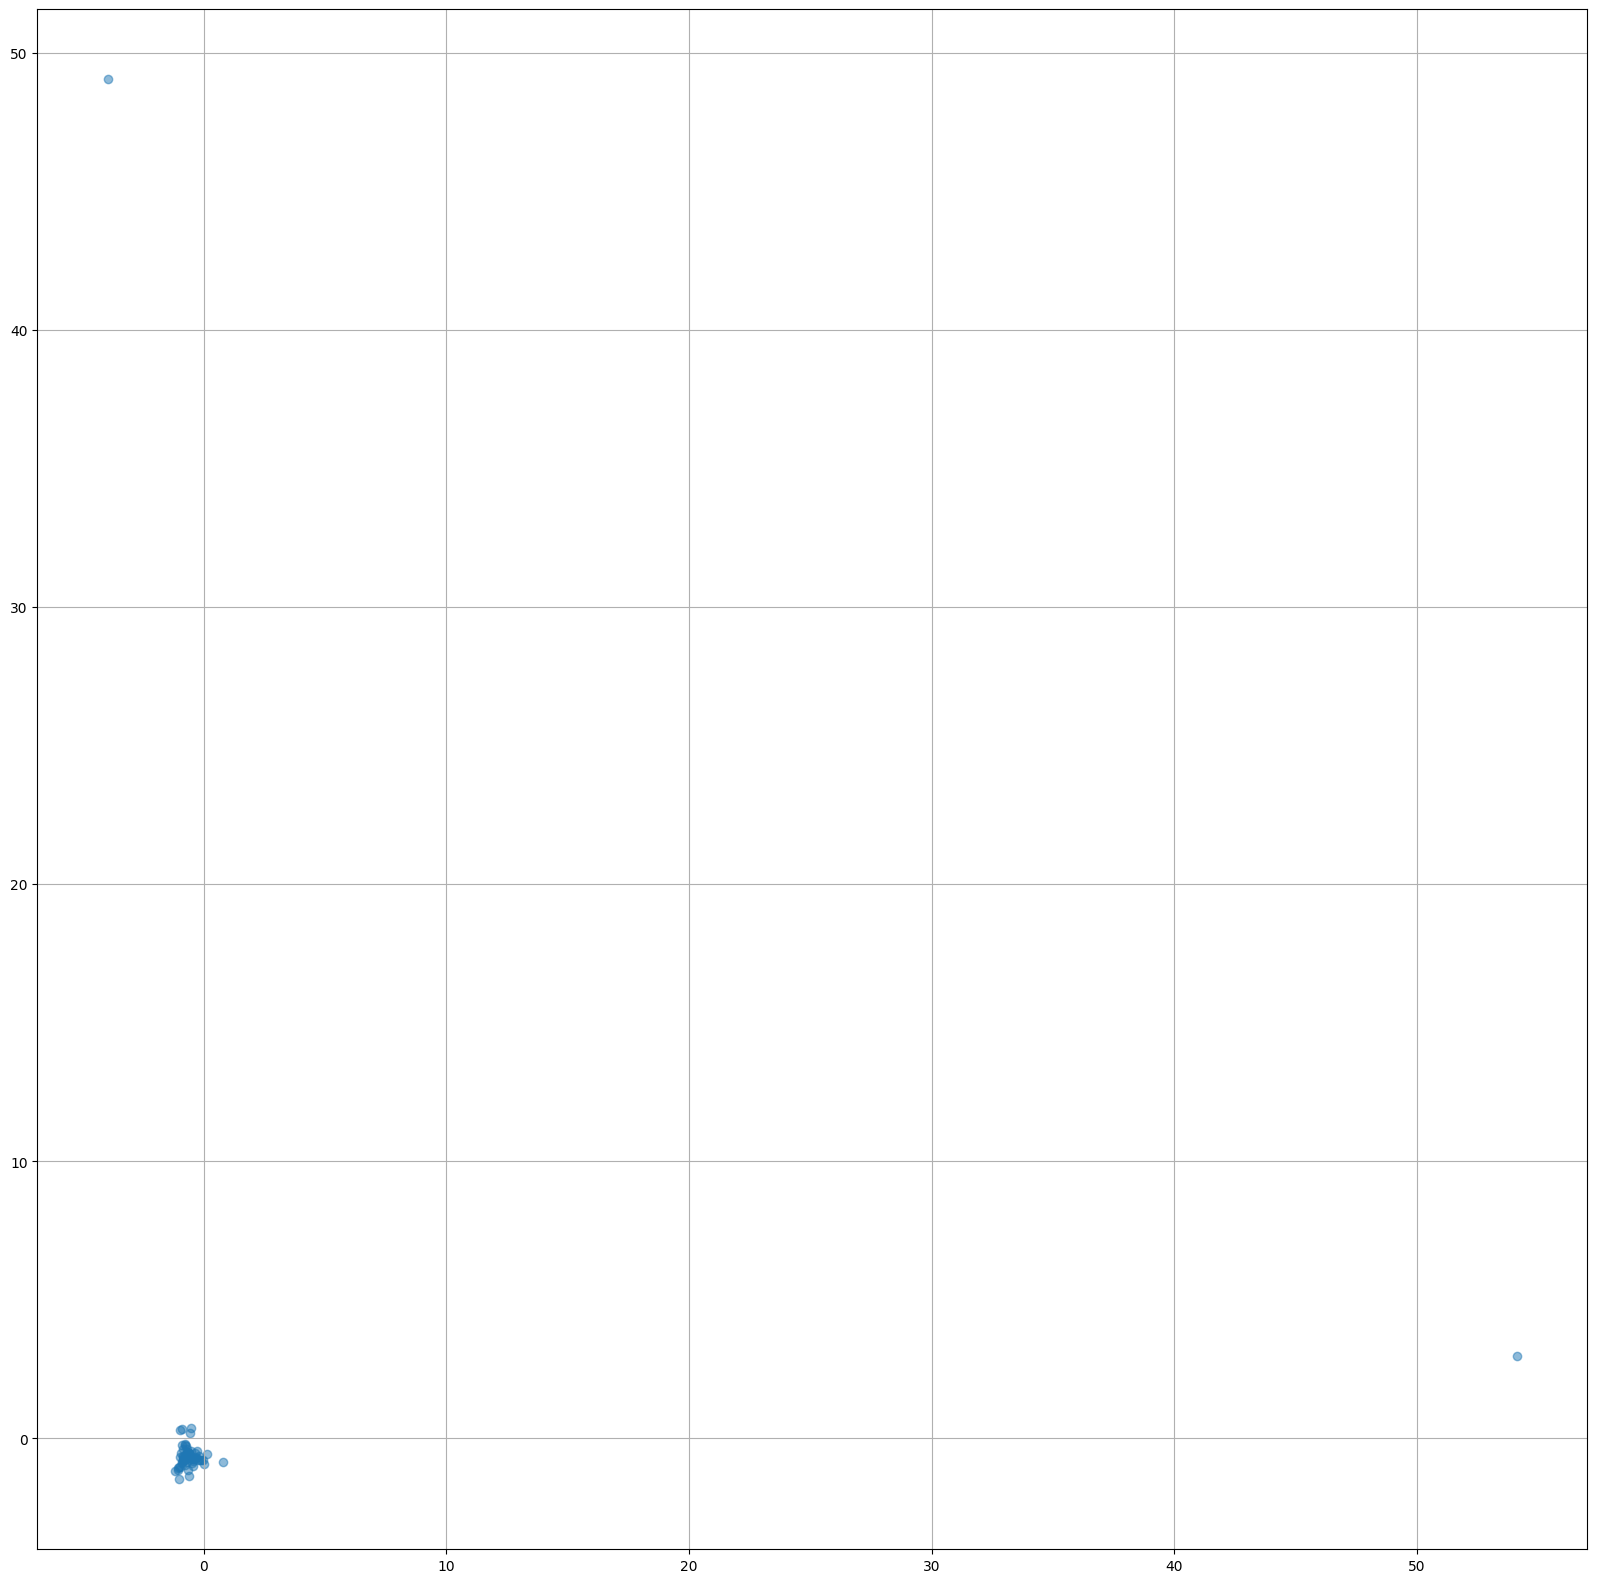

In [46]:

# & Mostramos los resultados en forma de tablita
scalar = StandardScaler(with_mean=False)
scaled_data = scalar.fit_transform(matriz)

# & Se reduce la complejidad a solo dos dimensiones, para poder hacer el gráfico
pca = PCA(n_components=2)
resultados_pca = pca.fit_transform(scaled_data)

# & Creamos un dataframe distinto dos con los resultados del PCA
df_pca = pd.DataFrame(resultados_pca, columns=['PC1', 'PC2'])

# & Scatteamos y graficamos
plt.figure(figsize=(20,20))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.grid(True)
plt.show


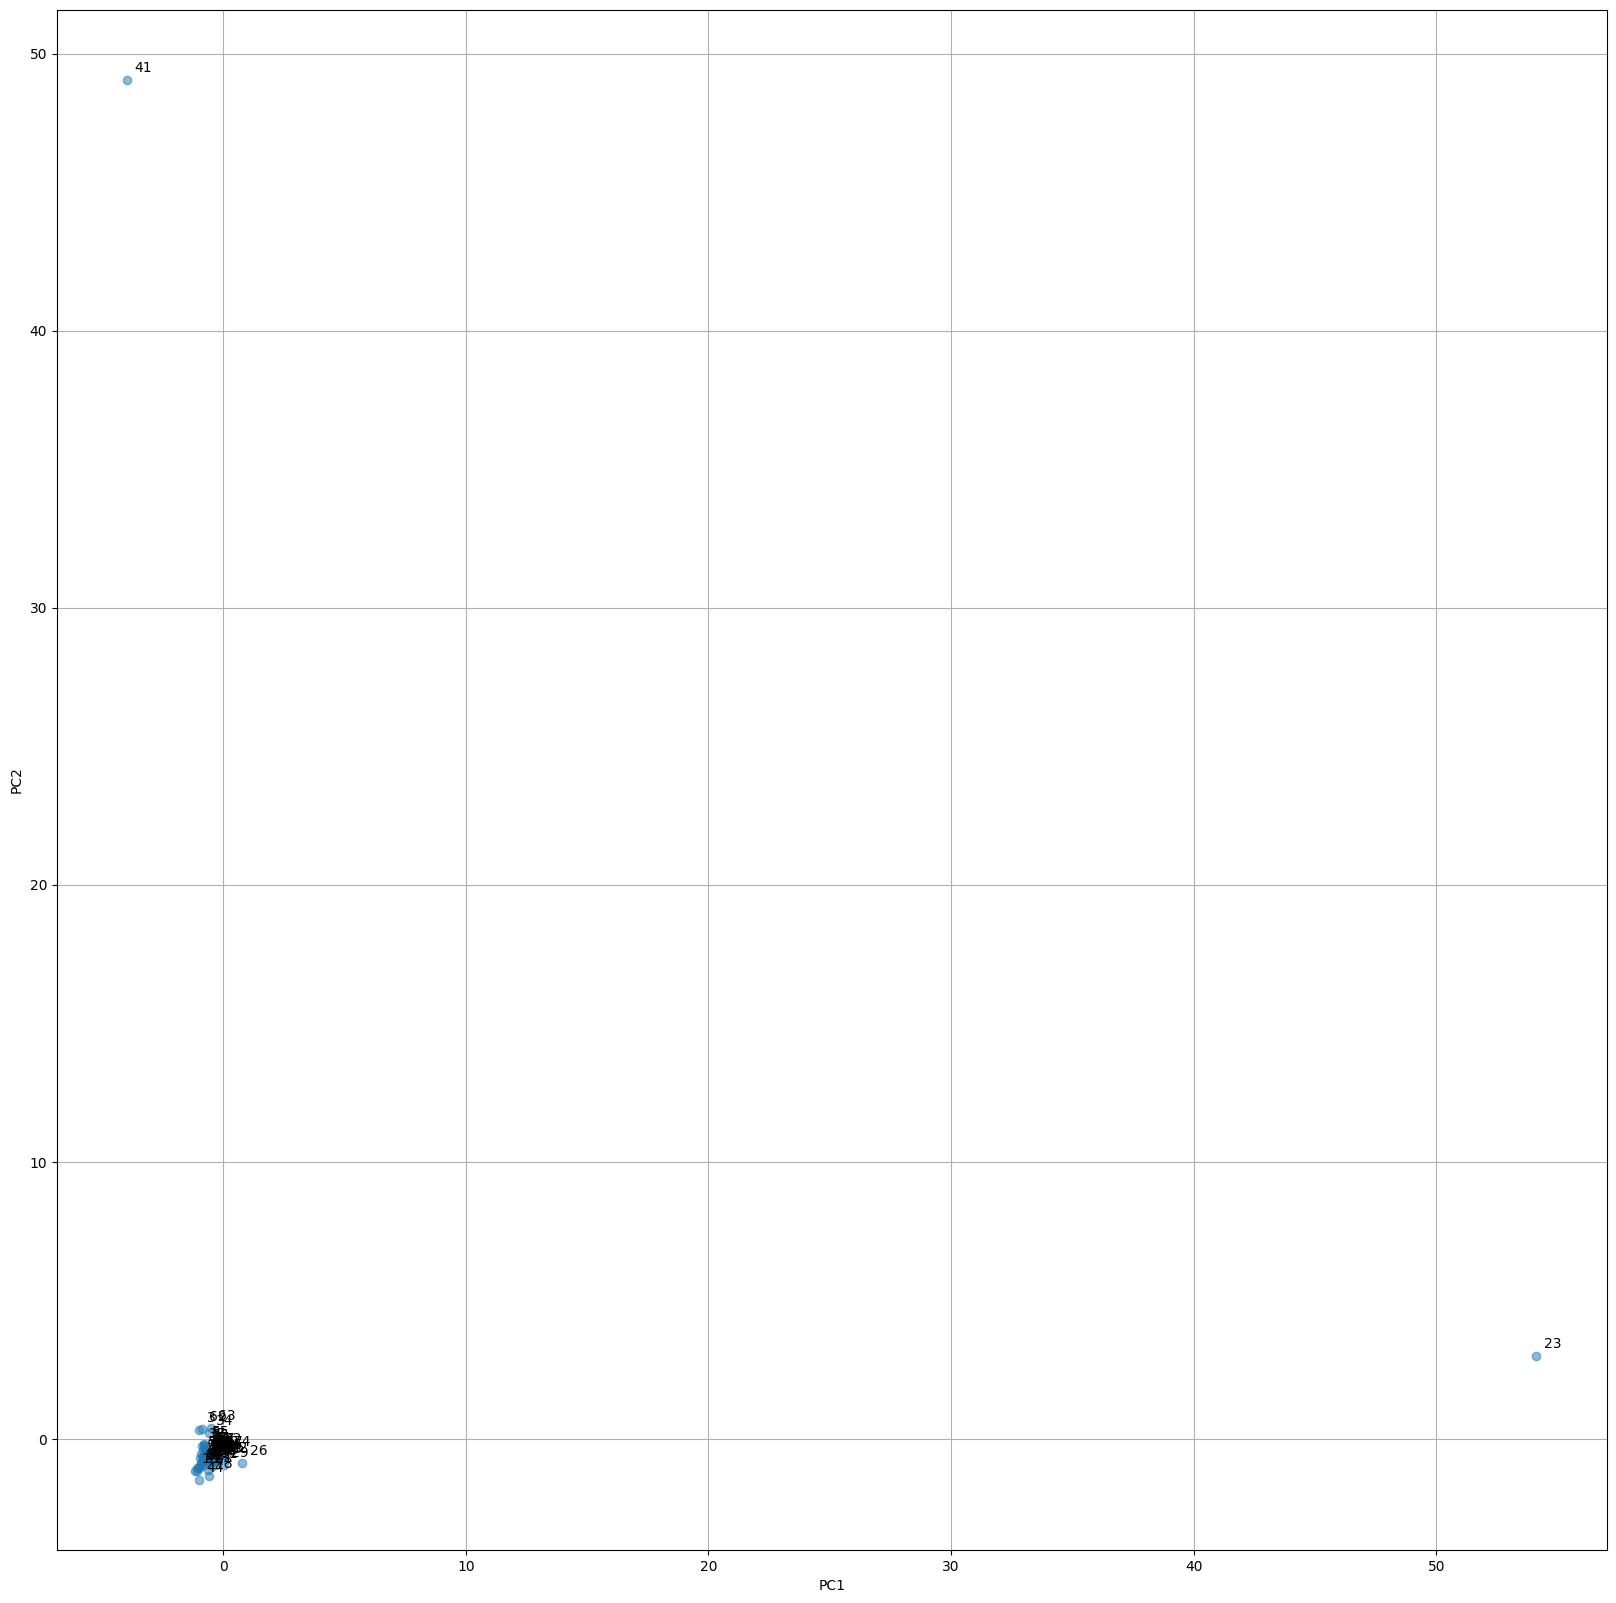

In [51]:

# & Esto es para poder graficar independiente del número de filas del data frame
num_filas = df_pca.shape[0]

plt.rcParams["figure.figsize"] = (20, 20)

# & Scatteamos
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)

for i in range(min(100, num_filas)):
    plt.text(df_pca['PC1'].iloc[i] + 0.3, df_pca['PC2'].iloc[i] + 0.3, str(i), fontsize=10)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



### Realizar una interpretación exploratoria de la información 

[0.06579591 0.05418854]
0.11998444567066838
[54.6221677 49.5704899]


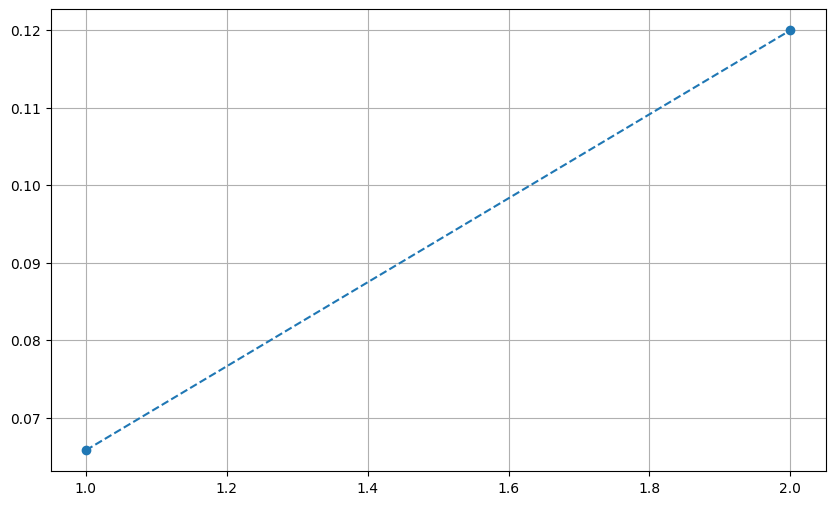

In [48]:

# & Printeamos datos revelantes
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca.singular_values_)

# & Hacemos un gráfico con la proporción de la varianza explicada acumulada que se obtuvo
vea = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(vea) + 1), vea, marker='o', linestyle='--')
plt.grid()
plt.show()


### Resultados

Varianza explicada por cada componente, en este caso, para reducir complicaciones, solo se tienen dos: donde el primer componente es del 9.64% y el segundo es de 3.11%. Lo que significa que, estos dos componentes explican la varianza total de los datos en un 12.75%

En realidad, son valores que no explican muy bien el fenómeno, pues los valores ignificativos están repartidos en más dimensiones, por lo que, agregando más dimensiones, se podría obtener un gráfico mucho más representativo.



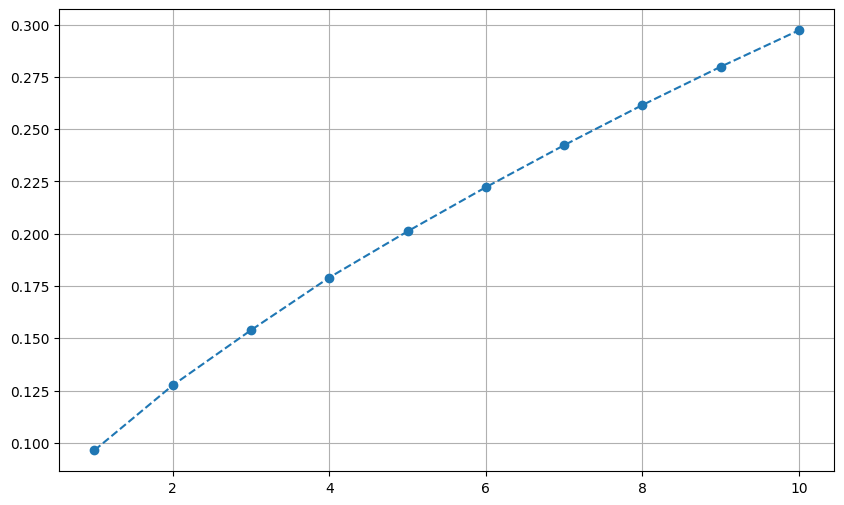

In [49]:

# & Ahora realizamos PCA
pca = PCA(n_components=10)
componentes_pca = pca.fit_transform(df_vectorizado)

# & Hacemos un gráfico con la proporción de la varianza explicada acumulada que se obtuvo
vea = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(vea) + 1), vea, marker='o', linestyle='--')
plt.grid()
plt.show()